In [15]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt

Definimos las constantes

In [16]:
# MACROS
NDATASETS = 10
NSAMPLES = 50
NLAMDAS = 40

Creamos las listas que usaremos a la hora de generar los datos

In [17]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(NSAMPLES)] for i in range(NDATASETS)]

In [18]:
for i in range(NDATASETS):
    X, y = make_regression(n_samples=10000, n_features=1000, noise=700, n_informative=500)
    DataMatrix[i].extend((X, y))

In [19]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.34464, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))


In [20]:
listTrainSamples = np.logspace(6, 8, num=NSAMPLES, base=3)
listTrainSamples = [round(item, 0) for item in listTrainSamples]

In [21]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [22]:
alpha_dict ={'alpha':np.logspace(0, 3, num=NLAMDAS, base=10)}

<h1> Lasso Regression </h1>


In [23]:
lasso_regressors = []
#matrixRidgeResults =  [[[[]*2 for i in range(25)] for j in range(NSAMPLES)] for i in range(NDATASETS)]
matrixLassoResults = np.zeros([NDATASETS,NSAMPLES,NLAMDAS,2])


# Creamos los diferentes ridge regressors
for alpha in alpha_dict.get('alpha'):
    lasso_regressors.append(Lasso(alpha=float(alpha)))


for i in range(NDATASETS):
    for j in range(len(listTrainSamples)):
        for idx, lasso_regressor in enumerate(lasso_regressors):
            lasso_regressor.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = lasso_regressor.predict(matrixDatasetTraintest[i][1])
            
            matrixLassoResults[i][j][idx][0] = lasso_regressor.alpha
            matrixLassoResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+05, tolerance: 1.582e+05
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.595e+05, tolerance: 1.554e+05
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [24]:
np.save('matrixLassoResults_NSamples', matrixLassoResults)

In [25]:
matrixLassoResults = np.load('matrixLassoResults_NSamples.npy')

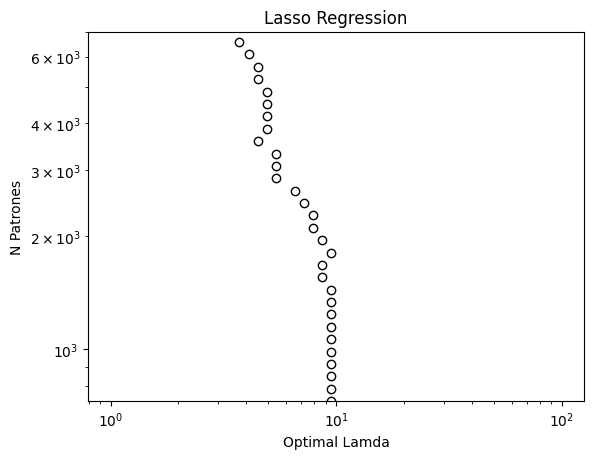

In [26]:
alphas = alpha_dict.get('alpha')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([NSAMPLES, NLAMDAS])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixLassoResultsInvertida = np.zeros([NLAMDAS, NSAMPLES, 2])

for i_sample in range(NSAMPLES):
    for i_alphavalue in range(25):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixLassoResults[i_dataset][i_sample][i_alphavalue][1])
            MatrixLassoResultsInvertida[i_alphavalue][i_sample][0] = matrixLassoResults[i_dataset][i_sample][i_alphavalue][0]
            MatrixLassoResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(NSAMPLES):
    for idx_alphavalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_alphavalue] = MatrixLassoResultsInvertida[idx_alphavalue][idx_sample][1]


f, ax = plt.subplots(1)


plt.ylim([729,7000])
plt.xscale('log')
plt.yscale('log')
plt.title("Lasso Regression")
plt.xlabel("Optimal Lamda")
plt.ylabel("N Samples")
for i_sample in range(NSAMPLES):
    plt.plot(alphas, r2_scores[i_sample])
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    print(alphas[i_maxValue])
    plt.plot(alphas[i_maxValue], listTrainSamples[i_sample], marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.show(f)